In [ ]:
from google.colab import  drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from google.colab import files #library to upload files to colab notebook
%matplotlib inline

In [ ]:
import seaborn as sn
pd.pandas.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/My Drive/sales_data_sample.csv', encoding = 'unicode_escape')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [ ]:
df.shape

(2823, 25)

### NULL VALUE TREatment

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
for col in df.columns:
  print((df[col].isnull().sum()/len(df[col]))*100)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.30216082182075
0.0
52.6390364860078
2.6921714488133195
0.0
38.04463336875664
0.0
0.0
0.0


In [ ]:
df.drop('ADDRESSLINE2', axis =1 , inplace = True)

In [ ]:
df.drop('STATE', axis =1 , inplace = True)

In [ ]:
df.shape

(2823, 23)

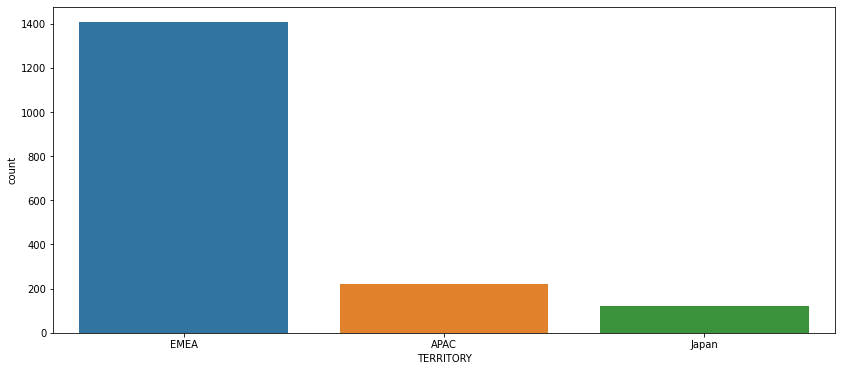

In [ ]:
plt.figure(figsize = (14,6))
sn.countplot( df['TERRITORY'])
plt.show()

In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df['ORDERDATE']

0      2003-02-24
1      2003-05-07
2      2003-07-01
3      2003-08-25
4      2003-10-10
          ...    
2818   2004-12-02
2819   2005-01-31
2820   2005-03-01
2821   2005-03-28
2822   2005-05-06
Name: ORDERDATE, Length: 2823, dtype: datetime64[ns]

In [ ]:
df['ADDRESSLINE1'].value_counts()

C/ Moralzarzal, 86              259
5677 Strong St.                 180
636 St Kilda Road                55
67, rue des Cinquante Otages     53
Fauntleroy Circus                51
                               ... 
5290 North Pendale Street        10
Boulevard Tirou, 255              8
16780 Pompton St.                 8
54, rue Royale                    7
4097 Douglas Av.                  3
Name: ADDRESSLINE1, Length: 92, dtype: int64

In [ ]:
df['CUSTOMERNAME'].value_counts()

Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 92, dtype: int64

In [ ]:
df = df.rename(columns = {'CUSTOMERNAME':'SELLER'})

In [ ]:
### POSTAL CODE GIVES INFO ABOUT CITY AND  ADDRESS AND CONTACT NAME AND ORDERNUMBER HAVE NO EFFECT ON ANALYSIS
df.drop(['ADDRESSLINE1', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME','CITY','TERRITORY'], axis = 1, inplace= True)
df.shape

(2823, 18)

In [ ]:
for col in df.columns:
  print(col,(df[col].isnull().sum()/len(df[col]))*100)

ORDERNUMBER 0.0
QUANTITYORDERED 0.0
PRICEEACH 0.0
ORDERLINENUMBER 0.0
SALES 0.0
ORDERDATE 0.0
STATUS 0.0
QTR_ID 0.0
MONTH_ID 0.0
YEAR_ID 0.0
PRODUCTLINE 0.0
MSRP 0.0
PRODUCTCODE 0.0
SELLER 0.0
PHONE 0.0
POSTALCODE 2.6921714488133195
COUNTRY 0.0
DEALSIZE 0.0


In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,SELLER,PHONE,POSTALCODE,COUNTRY,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,10022,USA,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,51100,France,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,75508,France,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,90003,USA,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,NaN,USA,Medium


In [ ]:
df['QTR_ID'].value_counts()

4    1094
1     665
2     561
3     503
Name: QTR_ID, dtype: int64

In [ ]:
df.nunique()

ORDERNUMBER         307
QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
SELLER               92
PHONE                91
POSTALCODE           73
COUNTRY              19
DEALSIZE              3
dtype: int64

In [ ]:
df.dtypes

ORDERNUMBER                 int64
QUANTITYORDERED             int64
PRICEEACH                 float64
ORDERLINENUMBER             int64
SALES                     float64
ORDERDATE          datetime64[ns]
STATUS                     object
QTR_ID                      int64
MONTH_ID                    int64
YEAR_ID                     int64
PRODUCTLINE                object
MSRP                        int64
PRODUCTCODE                object
SELLER                     object
PHONE                      object
POSTALCODE                 object
COUNTRY                    object
DEALSIZE                   object
dtype: object

In [ ]:
df['PHONE']

0             2125557818
1             26.47.1555
2       +33 1 46 62 7555
3             6265557265
4             6505551386
              ...       
2818      (91) 555 94 44
2819          981-443655
2820      (91) 555 94 44
2821          61.77.6555
2822          6175559555
Name: PHONE, Length: 2823, dtype: object

In [ ]:
df['PHONE'].value_counts()
### SAME CUSTOMERS HAVE SHOPPED MULTIPLE TIMES 

(91) 555 94 44      259
4155551450          180
03 9520 4555         55
40.67.8555           53
6175558555           51
                   ... 
2125551957           10
(071) 23 67 2555      8
6175558428            8
40.32.2555            7
3105552373            3
Name: PHONE, Length: 91, dtype: int64

In [ ]:
### PHONE NO. IS THE UNIQUE CUSTOMER ID
df['PHONE'] = df['PHONE'].astype('string')

### EDA AND DATA VISUALIZATION

In [ ]:
### FUNCTION FOR VISUALIZATION 
def barplot_visualization(x):
  fig = plt.Figure(figsize = (12, 6))
  fig = px.bar(x = df[x].value_counts().index, y = df[x].value_counts(), color = df[x].value_counts().index, height = 600)
  fig.show()

In [ ]:
barplot_visualization('COUNTRY')

In [ ]:
barplot_visualization('STATUS')

In [ ]:
### BUCKETING SKEWED COLUMN
df['STATUS'] = df['STATUS'].replace({'Cancelled':'Not shipped', 'Resolved':'Not shipped', 'On Hold':'Not shipped', 'In Process':'Not shipped', 'Disputed':'Not shipped'})
df['STATUS'].value_counts()

Shipped        2617
Not shipped     206
Name: STATUS, dtype: int64

In [ ]:
barplot_visualization('PRODUCTLINE')

In [ ]:
barplot_visualization('DEALSIZE')

In [ ]:
### LISTING OUT CATEGORICAL COLUMNS
df_categoric = df.select_dtypes(include=['object'])
df_categoric.head()

,STATUS,PRODUCTLINE,PRODUCTCODE,SELLER,POSTALCODE,COUNTRY,DEALSIZE
0,Shipped,Motorcycles,S10_1678,Land of Toys Inc.,10022,USA,Small
1,Shipped,Motorcycles,S10_1678,Reims Collectables,51100,France,Small
2,Shipped,Motorcycles,S10_1678,Lyon Souveniers,75508,France,Medium
3,Shipped,Motorcycles,S10_1678,Toys4GrownUps.com,90003,USA,Medium
4,Shipped,Motorcycles,S10_1678,Corporate Gift Ideas Co.,NaN,USA,Medium


In [ ]:
### BI-VARIATE ANALYSIS
def boxplot_visualization(x):
  fig = plt.Figure(figsize = (12, 8))
  fig = sn.boxplot(x = df[x], y = df['SALES'])
  plt.xticks(rotation = 90)
  plt.show()

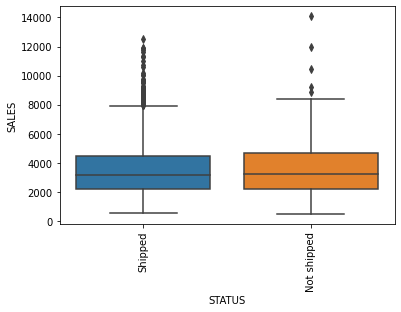

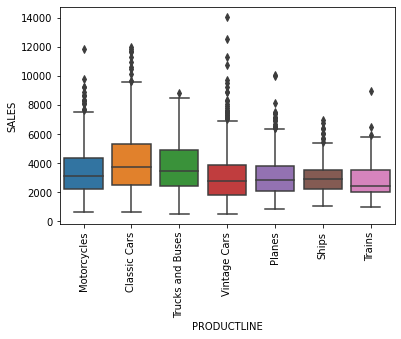

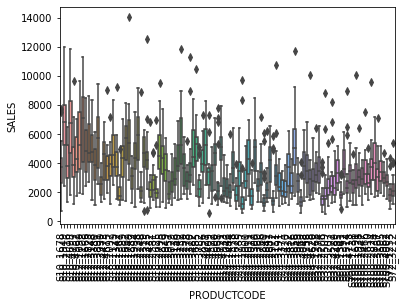

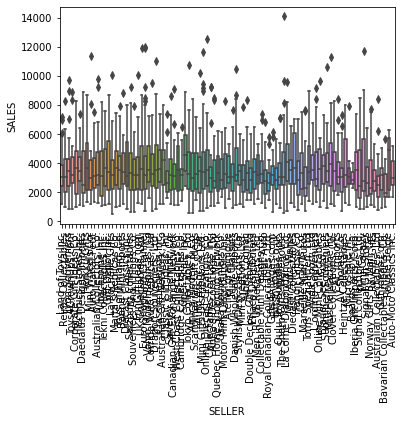

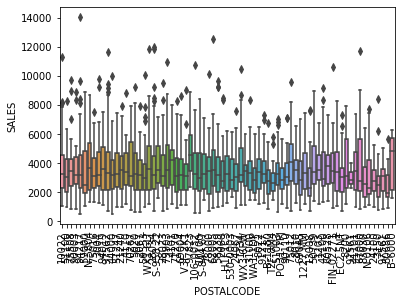

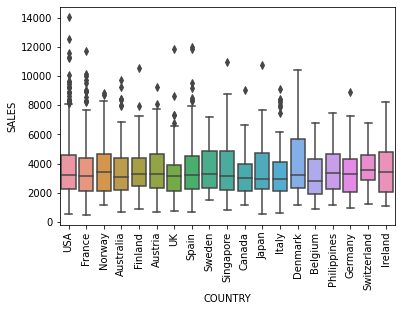

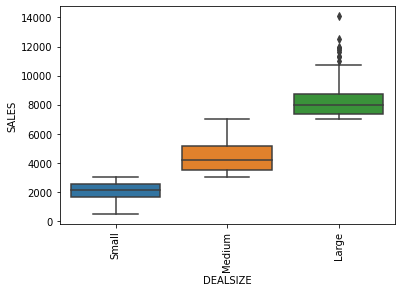

In [ ]:
for col in df_categoric.columns:
  boxplot_visualization(col)

### CLUSTERING 1 - BASED ON DERIVED FEATURES - CUSTOMER CENTRIC CLUSTERING 

### GROUPING DATA BY RECENCY, FREQUENCY AND MONETARY FOR EACH CUSTOMER

In [ ]:
df.columns

Index(['ORDERNUMBER', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS',
       'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE',
       'SELLER', 'PHONE', 'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [ ]:
df.head()

,ORDERNUMBER,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,SELLER,PHONE,POSTALCODE,COUNTRY,DEALSIZE
0,10107,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,10022,USA,Small
1,10121,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,51100,France,Small
2,10134,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,75508,France,Medium
3,10145,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,90003,USA,Medium
4,10159,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,NaN,USA,Medium


In [ ]:
df['YEAR_ID'].value_counts()

2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

In [ ]:
## GROUPING BY MONETARY
df_grouped = df.groupby(['PHONE'])[['SALES']].sum().reset_index()
df_grouped

,PHONE,SALES
0,(02) 5554 67,74972.52
1,(071) 23 67 2555,33440.10
2,(1) 42.34.2555,97203.68
3,(1) 47.55.6555,93170.66
4,(171) 555-0297,88804.50
...,...,...
86,88.60.1555,80438.48
87,90-224 8555,111250.38
88,91.24.4555,74936.14
89,9145554562,85555.99


In [ ]:
### FREQUENCY OF ORDERS FOR EACH CUSTOMER
frequency = df.groupby(['PHONE'])[['ORDERNUMBER']].count().reset_index()
frequency

,PHONE,ORDERNUMBER
0,(02) 5554 67,25
1,(071) 23 67 2555,8
2,(1) 42.34.2555,23
3,(1) 47.55.6555,27
4,(171) 555-0297,26
...,...,...
86,88.60.1555,19
87,90-224 8555,30
88,91.24.4555,25
89,9145554562,26


In [ ]:
### MERGING TWO DF 
df_merge = pd.merge(df_grouped, frequency, on = 'PHONE', how = 'inner')
df_merge.head()

,PHONE,SALES,ORDERNUMBER
0,(02) 5554 67,74972.52,25
1,(071) 23 67 2555,33440.10,8
2,(1) 42.34.2555,97203.68,23
3,(1) 47.55.6555,93170.66,27
4,(171) 555-0297,88804.50,26


In [ ]:
### RENAMING COLUMNS
df_merge = df_merge.rename(columns = {'ORDERNUMBER':'FREQUENCY'})
df_merge.head(1)

,PHONE,SALES,FREQUENCY
0,(02) 5554 67,74972.52,25


In [ ]:
max_date = df['ORDERDATE'].max()
max_date

Timestamp('2005-05-31 00:00:00')

In [ ]:
### CALCULATING RECENCY FOR EACH CUSTOMER 
df['RECENCY'] = max_date - df['ORDERDATE']
df['RECENCY']

0      827 days
1      755 days
2      700 days
3      645 days
4      599 days
         ...   
2818   180 days
2819   120 days
2820    91 days
2821    64 days
2822    25 days
Name: RECENCY, Length: 2823, dtype: timedelta64[ns]

In [ ]:
df_recency = df.groupby(['PHONE'])[['RECENCY']].min().reset_index()
df_recency.head()

,PHONE,RECENCY
0,(02) 5554 67,1 days
1,(071) 23 67 2555,141 days
2,(1) 42.34.2555,192 days
3,(1) 47.55.6555,54 days
4,(171) 555-0297,179 days


In [ ]:
df_final = pd.merge(df_merge, df_recency, on = 'PHONE', how = 'inner')
df_final.head()

,PHONE,SALES,FREQUENCY,RECENCY
0,(02) 5554 67,74972.52,25,1 days
1,(071) 23 67 2555,33440.10,8,141 days
2,(1) 42.34.2555,97203.68,23,192 days
3,(1) 47.55.6555,93170.66,27,54 days
4,(171) 555-0297,88804.50,26,179 days


In [ ]:
df_final.shape
### 91 CUSTOMERS 

(91, 4)

In [ ]:
df_final.dtypes

PHONE                 object
SALES                float64
FREQUENCY              int64
RECENCY      timedelta64[ns]
dtype: object

In [ ]:
df_final['RECENCY'] = df_final['RECENCY'].astype('string')

In [ ]:
df_final['RECENCY'] = df_final['RECENCY'].apply(lambda x: x.split(' ')[0])
df_final['RECENCY']

0       1
1     141
2     192
3      54
4     179
     ... 
86     47
87    111
88    145
89    228
90    120
Name: RECENCY, Length: 91, dtype: object

In [ ]:
df_final['RECENCY'] = df_final['RECENCY'].astype('int64')

### OUTLIER TREATMNET AND SCALING 

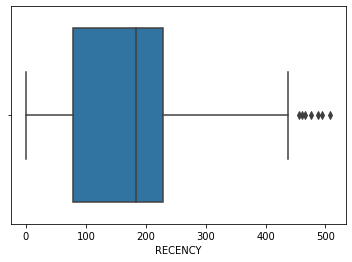

In [ ]:
sn.boxplot(df_final['RECENCY'])

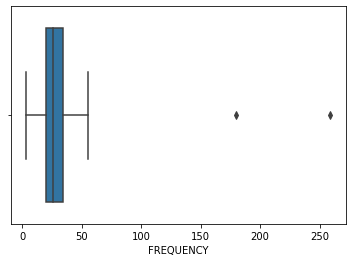

In [ ]:
sn.boxplot(df_final['FREQUENCY'])

In [ ]:
# removing (statistical) outliers
Q1 = df_final.SALES.quantile(0.05)
Q3 = df_final.SALES.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.SALES >= Q1 - 1.5*IQR) & (df_final.SALES <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = df_final.RECENCY.quantile(0.05)
Q3 = df_final.RECENCY.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.RECENCY >= Q1 - 1.5*IQR) & (df_final.RECENCY <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = df_final.FREQUENCY.quantile(0.05)
Q3 = df_final.FREQUENCY.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.FREQUENCY >= Q1 - 1.5*IQR) & (df_final.FREQUENCY <= Q3 + 1.5*IQR)]

In [ ]:
# 2. rescaling
rfm_df = df_final[['SALES', 'FREQUENCY', 'RECENCY']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(89, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['SALES', 'FREQUENCY', 'RECENCY']
rfm_df_scaled.head()

,SALES,FREQUENCY,RECENCY
0,-0.487739,-0.156076,-1.418644
1,-1.493288,-1.641249,-0.341280
2,0.050504,-0.330802,0.051188
3,-0.047141,0.018651,-1.010785
4,-0.152850,-0.068713,-0.048853


### MODELLING

In [ ]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([1, 3, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 3, 1, 0, 3, 1, 1, 1, 1,
       3, 2, 1, 2, 1, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 3, 0, 1, 1, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 3, 1, 2, 3, 2, 3, 0, 3, 2, 2, 0, 1, 1, 1, 3,
       1, 1, 0, 0, 3, 3, 2, 1, 1, 2, 1, 1, 2, 1, 0, 3, 2, 1, 1, 1, 1, 1,
       1], dtype=int32)

### FIND THE OPTIMAL NUMBER OF CLUSTERS 

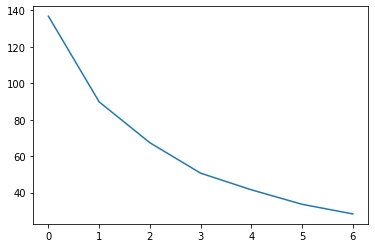

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### SIHOUETTE ANALYSIS

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.41217587499120817
For n_clusters=3, the silhouette score is 0.3858654712493955
For n_clusters=4, the silhouette score is 0.39677560405140533
For n_clusters=5, the silhouette score is 0.412803978837726
For n_clusters=6, the silhouette score is 0.41804384842472075
For n_clusters=7, the silhouette score is 0.41607885148346324
For n_clusters=8, the silhouette score is 0.4279829842665965


In [ ]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([2, 1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 1, 0, 0, 2, 2, 1, 2, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 2, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [ ]:
# assign the label
df_final['cluster_id'] = kmeans.labels_
df_final.head()

,PHONE,SALES,FREQUENCY,RECENCY,cluster_id
0,(02) 5554 67,74972.52,25,1,2
1,(071) 23 67 2555,33440.10,8,141,1
2,(1) 42.34.2555,97203.68,23,192,2
3,(1) 47.55.6555,93170.66,27,54,2
4,(171) 555-0297,88804.50,26,179,2


In [ ]:
df_final.tail()

,PHONE,SALES,FREQUENCY,RECENCY,cluster_id
86,88.60.1555,80438.48,19,47,2
87,90-224 8555,111250.38,30,111,2
88,91.24.4555,74936.14,25,145,2
89,9145554562,85555.99,26,228,2
90,981-443655,104370.38,32,120,2


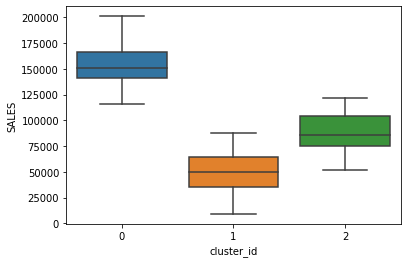

In [ ]:
# plot
sns.boxplot(x='cluster_id', y='SALES', data=df_final)

In [ ]:
df_final = df_final.set_index('PHONE')

,SALES,FREQUENCY,RECENCY,cluster_id
PHONE,,,,
88.60.1555,80438.48,19,47,2
90-224 8555,111250.38,30,111,2
91.24.4555,74936.14,25,145,2
9145554562,85555.99,26,228,2
981-443655,104370.38,32,120,2


In [ ]:
df_final.head()

,SALES,FREQUENCY,RECENCY,cluster_id
PHONE,,,,
(02) 5554 67,74972.52,25,1,2
(071) 23 67 2555,33440.10,8,141,1
(1) 42.34.2555,97203.68,23,192,2
(1) 47.55.6555,93170.66,27,54,2
(171) 555-0297,88804.50,26,179,2


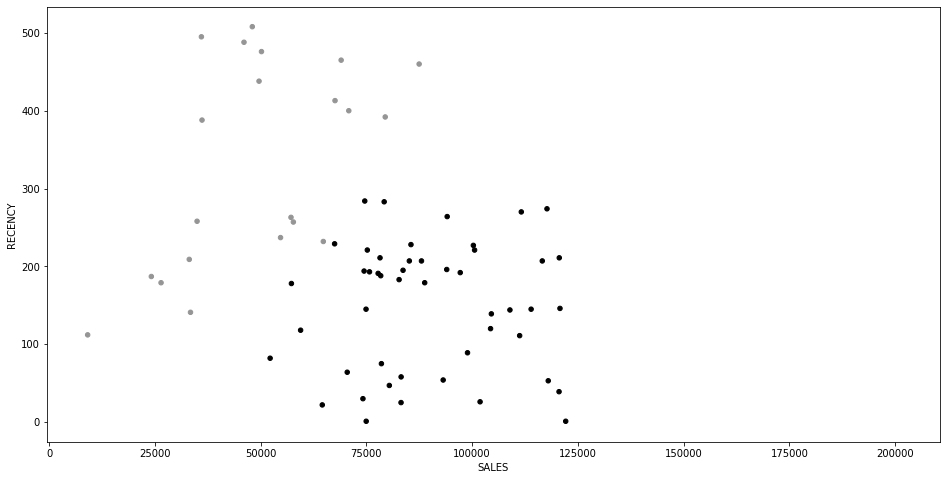

In [ ]:
## PLOTTING TO SEE THE CLUSTERS FROM THE PC DATAFRAME
df_final.plot(
        kind='scatter',
        x='SALES',y='RECENCY',
        c=df_final.cluster_id.astype(np.float), 
        figsize=(16,8))
### WE SEE MORE RECENT CUSTOMERS CONTRIBUTING TOWARDS HIGHER SALES BRACKET
### LOWER SALES CONTRIBUTION CUSTOMERS ARE ALSO LESS RECENT 

In [ ]:
# Visualize clusters using 3D-Scatterplot
fig = px.scatter_3d(df_final, x = 'SALES', y = 'FREQUENCY', z = 'RECENCY',
              color='cluster_id', symbol = 'cluster_id', size_max = 10, opacity = 0.7)
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

## HIERARCHIAL CLUSTERING

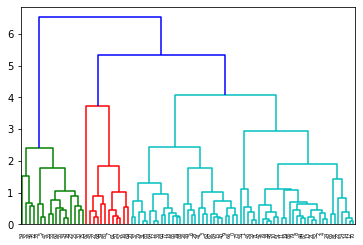

In [ ]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0])

In [ ]:
# assign cluster labels
df_final['cluster_labels'] = cluster_labels
df_final.head()

,PHONE,SALES,FREQUENCY,RECENCY,cluster_id,cluster_labels
0,(02) 5554 67,74972.52,25,1,2,0
1,(071) 23 67 2555,33440.10,8,141,0,0
2,(1) 42.34.2555,97203.68,23,192,2,0
3,(1) 47.55.6555,93170.66,27,54,2,0
4,(171) 555-0297,88804.50,26,179,2,0


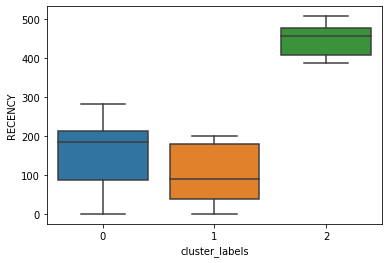

In [ ]:
# plots
sns.boxplot(x='cluster_labels', y='RECENCY', data=df_final)

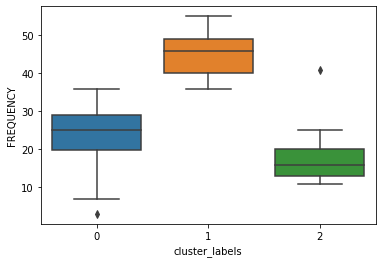

In [ ]:
# plots
sns.boxplot(x='cluster_labels', y='FREQUENCY', data=df_final)

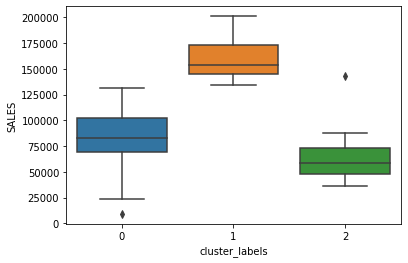

In [ ]:
# plots
sns.boxplot(x='cluster_labels', y='SALES', data=df_final)

In [ ]:
hist_columns = ['SALES', 'FREQUENCY', 'RECENCY']

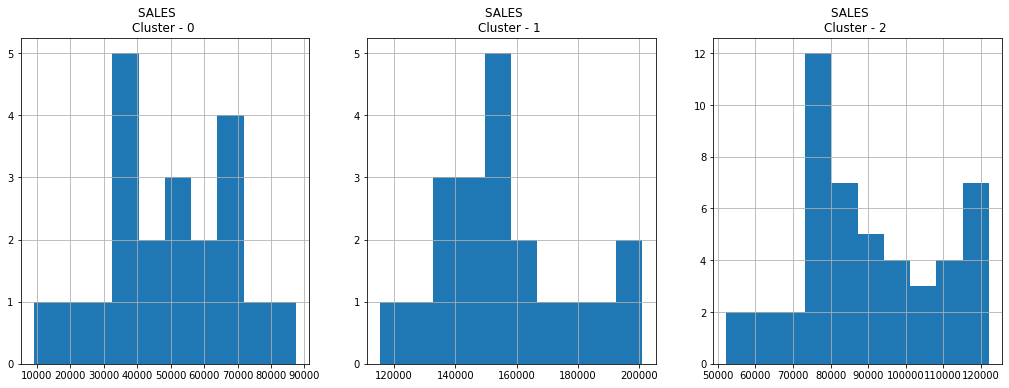

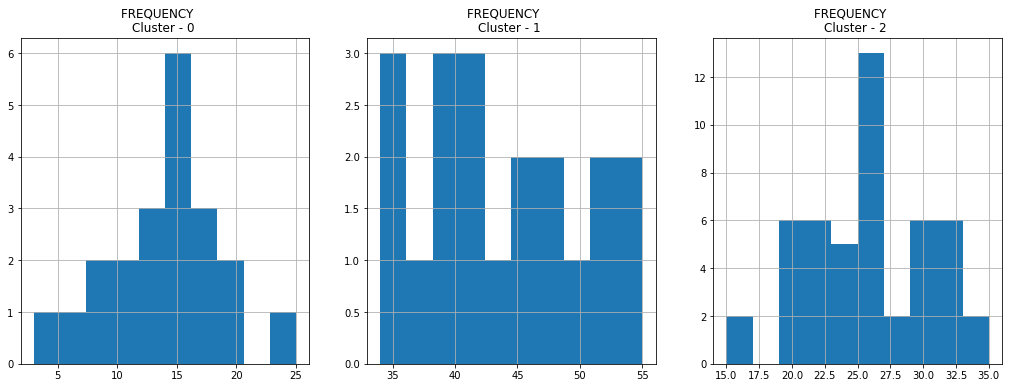

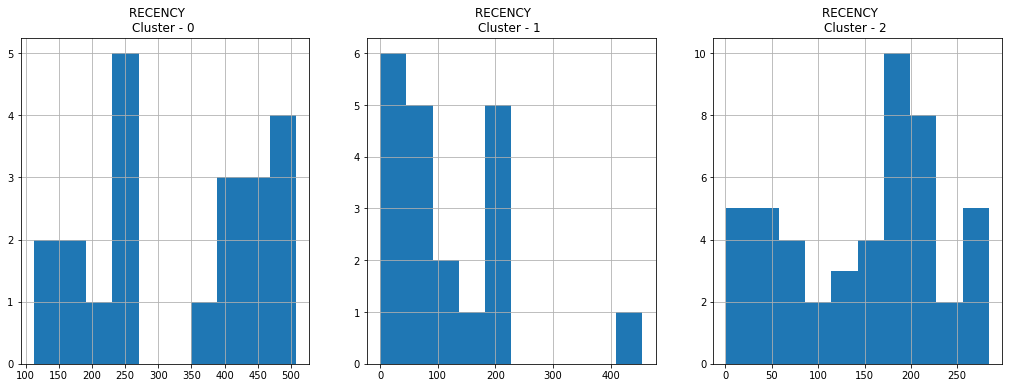

In [ ]:
# plot histogram for each feature based on cluster 
for i in hist_columns:
  plt.figure(figsize = (30, 6))
  for j in range(3):
    plt.subplot(1, 5, j+1)
    cluster = df_final[df_final['cluster_id'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

#### MOST FREQUENT AND THE MOST RECENT CUSTOMERS ARE THE HIGHEST CONTRIBUTORS TOWARDS SALES 

### CLUSTERING 2 BASED ON EXISTING FEATURES

In [ ]:
lst_categoric = df_categoric.columns
lst_categoric

Index(['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'SELLER', 'POSTALCODE',
       'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [ ]:
df_categoric.nunique()

STATUS           2
PRODUCTLINE      7
PRODUCTCODE    109
SELLER          92
POSTALCODE      73
COUNTRY         19
DEALSIZE         3
dtype: int64

In [ ]:
# Group data by order date
df_date_group = df.groupby(by = "ORDERDATE").sum()
df_date_group

,ORDERNUMBER,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERDATE,,,,,,,
2003-01-06,40400,10,12133.25,4,4,8012,363
2003-01-09,40404,10,11432.34,4,4,8012,372
2003-01-10,20204,3,6864.05,2,2,4006,155
2003-01-29,161648,136,54702.00,16,16,32048,1695
2003-01-31,131352,91,44621.96,13,13,26039,1365
...,...,...,...,...,...,...,...
2005-05-13,62502,21,31821.90,12,30,12030,728
2005-05-17,145866,105,59475.10,28,70,28070,1669
2005-05-29,156302,94,51233.18,30,75,30075,1328


In [ ]:
### TIME SERIES ANALYSIS
fig = px.line(x = df_date_group.index, y = df_date_group.SALES, title = 'Sales')
fig.show()

In [ ]:
### PEAK SALES IN MID NOV DEC 

In [ ]:
# We can drop 'ORDERDATE' and keep the rest of the date-related data such as 'MONTH'
df.drop("ORDERDATE", axis = 1, inplace = True)
df.shape

(2823, 17)

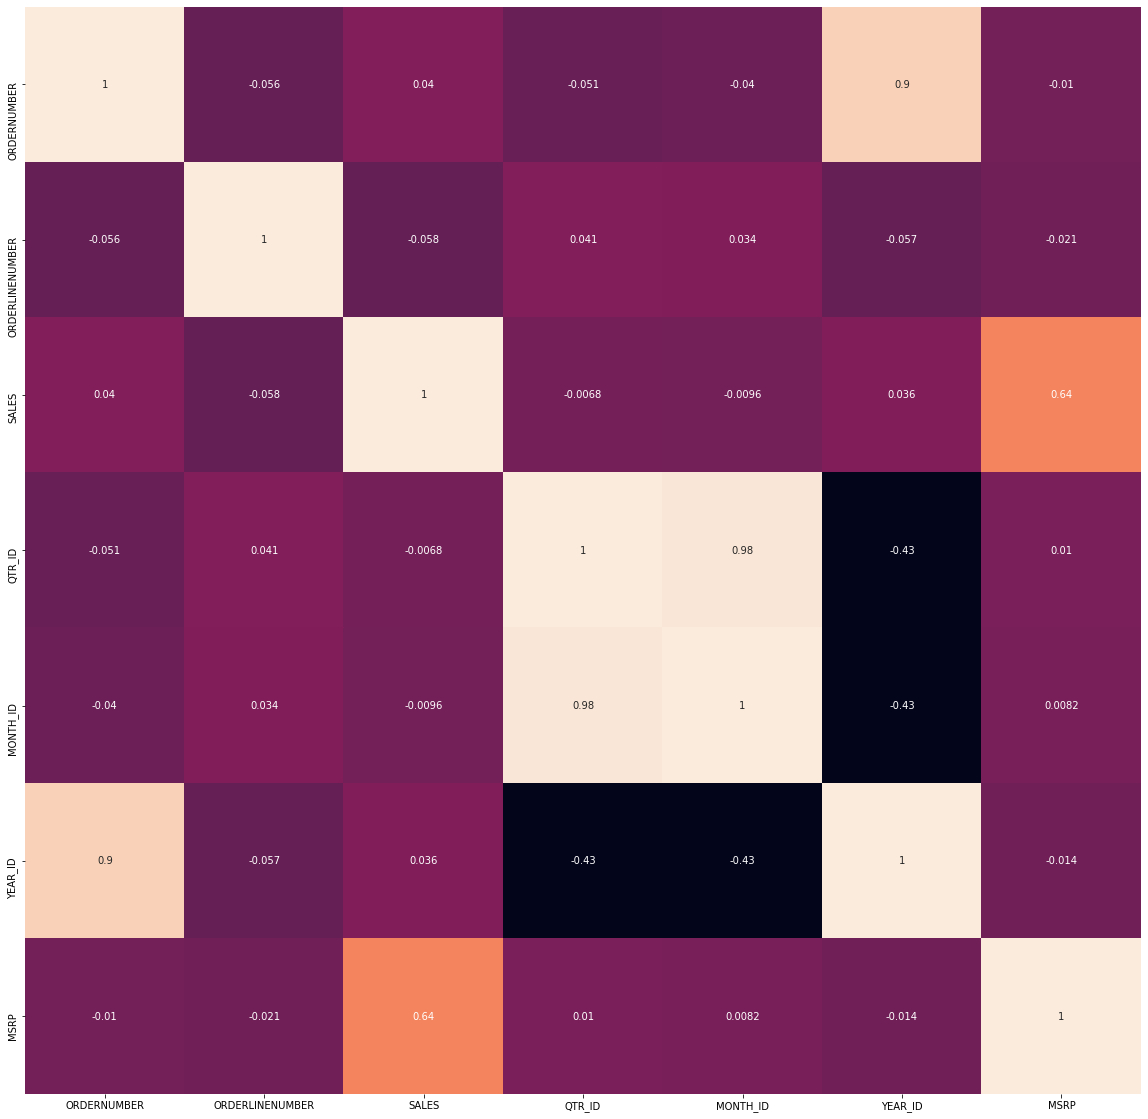

In [ ]:
plt.figure(figsize = (20, 20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cbar = False)

In [ ]:
df.drop(['QTR_ID', 'ORDERNUMBER'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'STATUS',
       'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'SELLER',
       'PHONE', 'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [ ]:
df.drop(['SELLER','POSTALCODE'],axis = 1, inplace = True)

In [ ]:
# Visualize the relationship between variables using pairplots
plt.figure(figsize = (15, 15))

fig = px.scatter_matrix(df,
    dimensions = df.columns, color = 'MONTH_ID')

fig.update_layout(
    title = 'Sales Data',
    width = 1100,
    height = 1100,
)
fig.show()

# It seems that sales growth exists as we move from 2013 to 2014 to 2015 ('SALES' vs. 'YEAR_ID')


<Figure size 1080x1080 with 0 Axes>

### K-MODE CLUSTERING

In [ ]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical

,STATUS,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE
0,Shipped,Motorcycles,S10_1678,USA,Small
1,Shipped,Motorcycles,S10_1678,France,Small
2,Shipped,Motorcycles,S10_1678,France,Medium
3,Shipped,Motorcycles,S10_1678,USA,Medium
4,Shipped,Motorcycles,S10_1678,USA,Medium
...,...,...,...,...,...
2818,Shipped,Ships,S72_3212,Spain,Small
2819,Shipped,Ships,S72_3212,Finland,Medium
2820,Not shipped,Ships,S72_3212,Spain,Medium
2821,Shipped,Ships,S72_3212,France,Small


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,STATUS,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE
0,1,1,0,18,2
1,1,1,0,6,2
2,1,1,0,6,1
3,1,1,0,18,1
4,1,1,0,18,1


In [ ]:
!pip3 install kmodes

In [ ]:
from kmodes.kmodes import KModes
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_categorical)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8091.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 6919.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 6507.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 6216.0


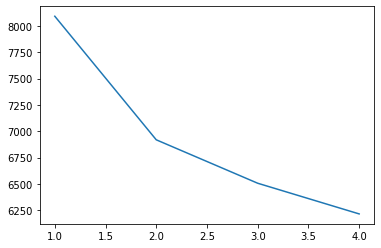

In [ ]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [ ]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_categorical)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8, cost: 6919.0


In [ ]:
fitClusters_cao

array([0, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [ ]:
df_categorical['clusters'] = fitClusters_cao
df_categorical.head()

,STATUS,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE,clusters
0,1,1,0,18,2,0
1,1,1,0,6,2,1
2,1,1,0,6,1,0
3,1,1,0,18,1,0
4,1,1,0,18,1,0


In [ ]:
df_categorical1 = df_categorical[df_categorical['clusters'] == 1]
df_categorical0 = df_categorical[df_categorical['clusters'] == 0]

In [ ]:
df_categorical1.info()

,STATUS,PRODUCTLINE,PRODUCTCODE,COUNTRY,DEALSIZE,clusters
1,1,1,0,6,2,1
6,1,1,0,6,2,1
16,1,1,0,5,2,1
21,1,1,0,0,2,1
22,1,1,0,6,2,1
...,...,...,...,...,...,...
2813,1,3,108,9,2,1
2814,1,3,108,17,2,1
2815,1,3,108,6,2,1
2818,1,3,108,14,2,1


In [ ]:
df_categorical1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 1 to 2821
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   STATUS       823 non-null    int64 
 1   PRODUCTLINE  823 non-null    int64 
 2   PRODUCTCODE  823 non-null    int64 
 3   COUNTRY      823 non-null    int64 
 4   DEALSIZE     823 non-null    int64 
 5   clusters     823 non-null    uint16
dtypes: int64(5), uint16(1)
memory usage: 40.2 KB


In [ ]:
df_categorical0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 2822
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   STATUS       2000 non-null   int64 
 1   PRODUCTLINE  2000 non-null   int64 
 2   PRODUCTCODE  2000 non-null   int64 
 3   COUNTRY      2000 non-null   int64 
 4   DEALSIZE     2000 non-null   int64 
 5   clusters     2000 non-null   uint16
dtypes: int64(5), uint16(1)
memory usage: 97.7 KB


In [ ]:
# Checking the count per category for PRODUCTLINE
PRODUCTLINE_df1 = pd.DataFrame(df_categorical1['PRODUCTLINE'].value_counts())
PRODUCTLINE_df0 = pd.DataFrame(df_categorical0['PRODUCTLINE'].value_counts())

In [ ]:
PRODUCTLINE_df1.head()

,PRODUCTLINE
6,369
2,121
1,94
3,86
5,72


In [ ]:
PRODUCTLINE_df0.head()

,PRODUCTLINE
0,919
6,238
1,237
5,229
2,185


In [ ]:
### FUNCTION FOR VISUALIZATION 

fig = plt.Figure(figsize = (12, 6))
fig = px.bar(x=PRODUCTLINE_df1.index, y=PRODUCTLINE_df1['PRODUCTLINE'], color = PRODUCTLINE_df1['PRODUCTLINE'].value_counts().index, height = 600)
fig.show()

In [ ]:

fig = plt.Figure(figsize = (12, 6))
fig = px.bar(x=PRODUCTLINE_df0.index, y=PRODUCTLINE_df0['PRODUCTLINE'], color = PRODUCTLINE_df0['PRODUCTLINE'].value_counts().index, height = 600)
fig.show()

#### WE SEE PRODUCTLINE 6 BELONGS TO ONE CLUSTER WHILE MOST OF THE REST BELONG TO THE OTHER 